In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('dados_alura.csv')
dados

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,0.0,0.0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,0.0,0.0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,1.0,0.0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,0.0,0.0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,alugado,quitar,A,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,IuYkEXvw-YDnc,IT0YNmM9-xJUf,q0YwGXaQ-ZTgQ,alugado,saude,D,39.0,33996.0,6.0,4000.0,11.49,0.12,13.0,0.0,1.0
34474,toJSgLh4-Sf0s,dBBYeSyf-N3y2,QU4yUUO4-sZ0f,financiado,reforma,A,24.0,36000.0,6.0,14775.0,6.62,0.41,4.0,0.0,0.0
34475,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27.0,39600.0,11.0,4800.0,6.76,0.12,9.0,0.0,0.0
34476,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30.0,39996.0,8.0,10000.0,12.73,0.25,6.0,0.0,0.0


## Testando apenas com os dados numéricos

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados[['idade', 'salario', 'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente', 'INADIMPLENCIA']]
y = dados['RISCO_INADIMPLENCIA']
SEED = 1
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 84.26%


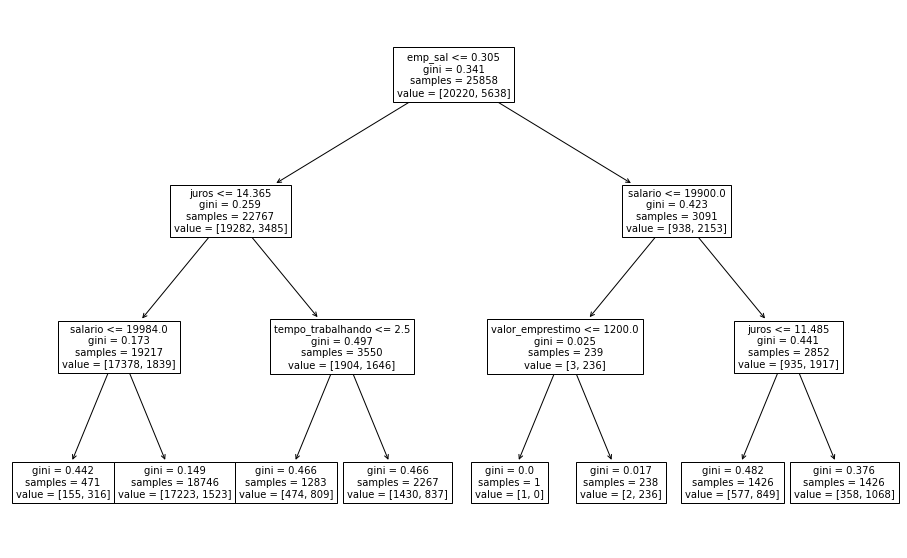

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))  
tree.plot_tree(clf, feature_names=['idade', 'salario', 'tempo_trabalhando', 'valor_emprestimo', 'juros',
       'emp_sal', 'tempo_cliente', 'INADIMPLENCIA'], fontsize=10)
plt.show()

In [7]:
from sklearn.model_selection import cross_validate
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [84.00, 85.36]


In [8]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [84.00, 85.38]


In [9]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.03470087, 0.03127289, 0.0248456 , 0.02567458, 0.02366376]),
 'score_time': array([0.        , 0.00202394, 0.        , 0.        , 0.        ]),
 'test_score': array([0.84846288, 0.8512181 , 0.84425754, 0.8484409 , 0.84162437])}

In [10]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.8466744 , 0.84338747, 0.84300077, 0.84993231, 0.85167279])

In [11]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0.62075562, 0.61206897, 0.62056075, 0.63187856, 0.6345879 ])

In [12]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.8466744 , 0.84338747, 0.84300077, 0.84993231, 0.85167279])

In [13]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.5692337 , 0.57797113, 0.57334693, 0.58532953, 0.58094954])

In [14]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='precision')

array([0.67393562, 0.665625  , 0.65612648, 0.67889908, 0.68518519])

In [15]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0.57535461, 0.56648936, 0.58865248, 0.59094942, 0.59094942])

In [16]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.80759309, 0.81282905, 0.8118533 , 0.81221163, 0.80713186])

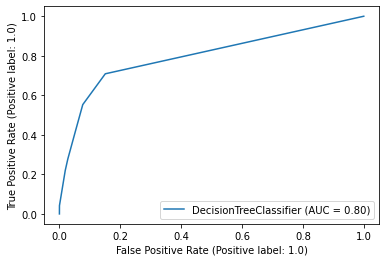

In [17]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(teste_y, previsoes))

[[6224  517]
 [ 840 1039]]


In [44]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()* desvio_padrao * 100
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [86.08, 86.65]


## Agora transformando os dados categóricos

In [19]:
df_dummies = pd.get_dummies(dados.drop(['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
34474,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
34475,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
34476,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [20]:
df_modificado = dados[['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [21]:
dados_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_final.head()

,id_cliente,id_emprestimo,id_historico,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,...,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,...,0,0,0,0,1,0,0,0,0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,...,0,0,0,1,0,0,0,0,0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,...,0,0,1,0,0,1,0,0,0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,...,0,0,1,0,1,0,0,0,0,0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
dados_final.to_csv('dados.csv', index = False)

In [23]:
x = dados_final.drop(['id_cliente', 'id_emprestimo', 'id_historico', 'RISCO_INADIMPLENCIA'], axis = 1)
y = dados_final['RISCO_INADIMPLENCIA']

In [24]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


In [25]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 87.15%


In [26]:
dados_final.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'idade', 'salario',
       'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal',
       'tempo_cliente', 'INADIMPLENCIA', 'RISCO_INADIMPLENCIA',
       'tipo_imovel_alugado', 'tipo_imovel_financiado', 'tipo_imovel_outro',
       'tipo_imovel_proprio', 'motivo_emprestimo_ensino',
       'motivo_emprestimo_pessoal', 'motivo_emprestimo_quitar',
       'motivo_emprestimo_reforma', 'motivo_emprestimo_risco',
       'motivo_emprestimo_saude', 'grupo_A', 'grupo_B', 'grupo_C', 'grupo_D',
       'grupo_E', 'grupo_F', 'grupo_G'],
      dtype='object')

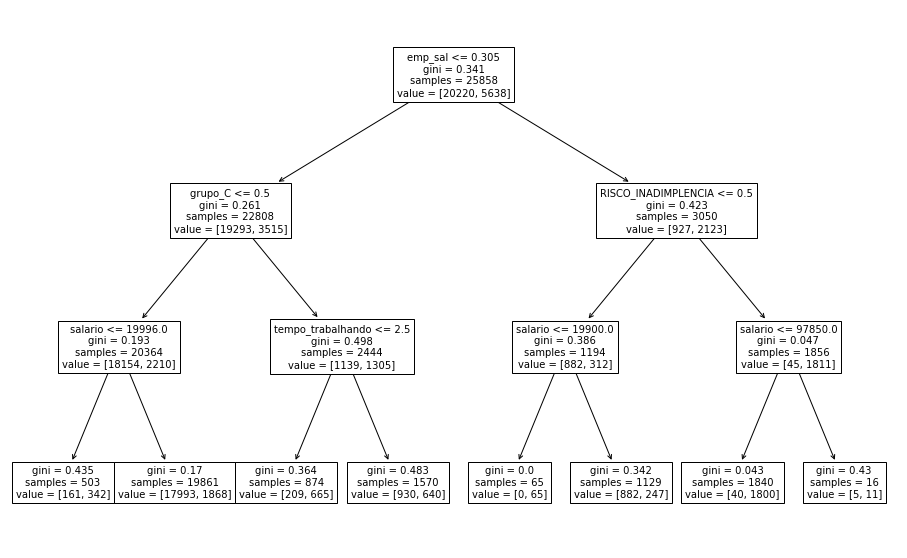

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))  
tree.plot_tree(clf, feature_names=['idade', 'salario',
       'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal',
       'tempo_cliente', 'INADIMPLENCIA', 'RISCO_INADIMPLENCIA',
       'tipo_imovel_alugado', 'tipo_imovel_financiado', 'tipo_imovel_outro',
       'tipo_imovel_proprio', 'motivo_emprestimo_ensino',
       'motivo_emprestimo_pessoal', 'motivo_emprestimo_quitar',
       'motivo_emprestimo_reforma', 'motivo_emprestimo_risco',
       'motivo_emprestimo_saude', 'grupo_A', 'grupo_B', 'grupo_C', 'grupo_D',
       'grupo_E', 'grupo_F', 'grupo_G'], fontsize=10)
plt.show()

In [29]:
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [85.23, 87.87]


In [30]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [85.96, 87.95]


In [31]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.15088892, 0.08274841, 0.11378217, 0.11903882, 0.13684106]),
 'score_time': array([0.00997686, 0.00877595, 0.00769138, 0.0075438 , 0.01319575]),
 'test_score': array([0.86426914, 0.87833527, 0.8636891 , 0.86033358, 0.86076867])}

In [32]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.87664346, 0.8633024 , 0.87296984, 0.86482305, 0.86985109])

In [33]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0.63914027, 0.6873065 , 0.64809855, 0.67773167, 0.61255037])

In [34]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.87664346, 0.8633024 , 0.87296984, 0.86482305, 0.86985109])

In [35]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.65499877, 0.67821966, 0.684838  , 0.66122924, 0.64428347])

In [36]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='precision')

array([0.8828125 , 0.68578994, 0.81867388, 0.70537428, 0.87213115])

In [37]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0.50088652, 0.68882979, 0.53634752, 0.65217391, 0.47204969])

In [38]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.79319123, 0.83580394, 0.82755053, 0.81512732, 0.78985606])

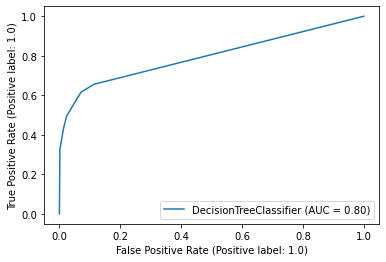

In [39]:
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [40]:
print(confusion_matrix(teste_y, previsoes))

[[6582  159]
 [ 949  930]]
